# Import and Install Dependencies 

In [1]:
!pip install tensorflow mediapipe scikit-learn opencv-python matplotlib

In [3]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [99]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [101]:
#mediapipe holistics model 

mediapipe_holistic = mp.solutions.holistic
mediapipe_drawing = mp.solutions.drawing_utils

## setup mediapipe

In [104]:
#function to apply holistic model on the image i.e. each frame in our sequence

def run_mediapipe(frame, detector):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb_frame.flags.writeable = False
    detection = detector.process(rgb_frame)
    rgb_frame.flags.writeable = True
    output_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2BGR)
    return output_frame, detection

In [106]:
#to visualise the holistic landmarks

def landmark_visual(image, results):
    mediapipe_drawing.draw_landmarks(image, results.face_landmarks, mediapipe_holistic.FACEMESH_CONTOURS)
    mediapipe_drawing.draw_landmarks(image, results.pose_landmarks, mediapipe_holistic.POSE_CONNECTIONS)
    mediapipe_drawing.draw_landmarks(image, results.left_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS)
    mediapipe_drawing.draw_landmarks(image, results.right_hand_landmarks, mediapipe_holistic.HAND_CONNECTIONS)

In [ ]:
#video capturing demo with holistic model

capture = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
with mediapipe_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holis:
    while capture.isOpened():
        ret, frame = capture.read()
    
        image, results = run_mediapipe(frame, holis)
        print(results)

        landmark_visual(image, results)
        cv2.putText(image, 'Starting Collection', (50,50), cv2.FONT_HERSHEY_DUPLEX, 3, (0,255,0), 4, cv2.LINE_AA)
        cv2.imshow("OpenCV feed", image)

        #to exit the window without any crashes
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capture.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)   #mac os trick

In [110]:
capture.release()
cv2.destroyAllWindows()

In [112]:
landmark_visual(frame, results)

In [114]:
results.right_hand_landmarks

landmark {
  x: 0.1607464998960495
  y: 0.5229046940803528
  z: 3.7396696939140384e-07
}
landmark {
  x: 0.20590990781784058
  y: 0.4778076410293579
  z: -0.02115757204592228
}
landmark {
  x: 0.2330673336982727
  y: 0.41934025287628174
  z: -0.02506621927022934
}
landmark {
  x: 0.24949073791503906
  y: 0.3511054217815399
  z: -0.027183445170521736
}
landmark {
  x: 0.26680997014045715
  y: 0.3017145097255707
  z: -0.02855316549539566
}
landmark {
  x: 0.2097577452659607
  y: 0.3335622251033783
  z: 0.0035946823190897703
}
landmark {
  x: 0.22115178406238556
  y: 0.25696542859077454
  z: -0.0012958790175616741
}
landmark {
  x: 0.2250051498413086
  y: 0.20889191329479218
  z: -0.009562172926962376
}
landmark {
  x: 0.22749675810337067
  y: 0.16538004577159882
  z: -0.01618356630206108
}
landmark {
  x: 0.1835034340620041
  y: 0.3250727355480194
  z: 0.008301954716444016
}
landmark {
  x: 0.189029261469841
  y: 0.24164661765098572
  z: 0.006429745350033045
}
landmark {
  x: 0.190375924

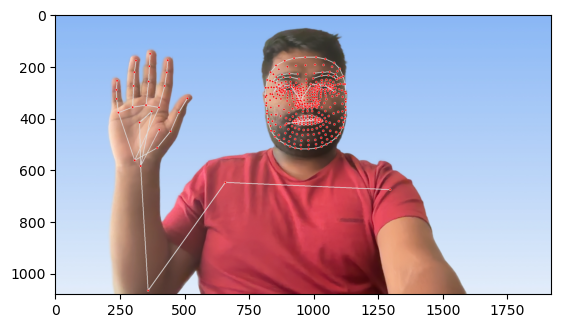

In [118]:
#example plot of visualisation of mediapipe
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# extract keypoint values

In [121]:
#to extract face, hand and pose keypoints

def ext_keypoint(results):
    pose = np.array([[result.x, result.y, result.z, result.visibility] for result in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[result.x, result.y, result.z] for result in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand = np.array([[result.x, result.y, result.z] for result in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[result.x, result.y, result.z] for result in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [123]:
ext_keypoint(results)

array([ 0.49505389,  0.30869091, -0.75246543, ...,  0.12537408,
        0.23887733, -0.00245885])

# Setup folder for collection

In [126]:
#Define actions to perform and folders to store its keypoints

DATA_PATH = os.path.join("MP_Data")

actions = np.array(['hello','thank you','sorry','please','exit','elevator','deaf','hearing','yes','no','learning'])
no_sequences = 30
sequence_length = 30

In [47]:
#Loop to create folder for each action

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# COllect keypoint values for training and testing

In [ ]:
capture = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
with mediapipe_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holis:

    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = capture.read()
            
                image, results = run_mediapipe(frame, holis)
                print(results)
        
                landmark_visual(image, results)

                #collection logic
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (200,400), cv2.FONT_HERSHEY_DUPLEX, 3, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (50,50), 
                                cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0), 4, cv2.LINE_AA)
                
                keypoints = ext_keypoint(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv2.imshow("OpenCV feed", image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    capture.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

# Preprocess data and Label the features

In [129]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [131]:
#to label all the actions 
label_map = {label:num for num, label in enumerate(actions)}

In [133]:
label_map

{'hello': 0,
 'thank you': 1,
 'sorry': 2,
 'please': 3,
 'exit': 4,
 'elevator': 5,
 'deaf': 6,
 'hearing': 7,
 'yes': 8,
 'no': 9,
 'learning': 10}

In [135]:
#give respective label to each sequence in an action 

seq, lbls = [], []
for action in actions:
    for sequence in range(no_sequences):
        space = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            space.append(res)
        seq.append(space)
        lbls.append(label_map[action])

In [136]:
np.array(seq).shape

(330, 30, 1662)

In [139]:
np.array(lbls).shape

(330,)

In [141]:
X = np.array(seq)

In [143]:
X.shape

(330, 30, 1662)

In [145]:
y = to_categorical(lbls).astype(int)

In [147]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [149]:
X_test.shape

(33, 30, 1662)

# model training

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [154]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', 
               input_shape=(30,1662),
               kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(LSTM(64, return_sequences=True, activation='relu',
               kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='relu',
               kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(actions.shape[0], activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [158]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [151]:
model.fit(X_train, y_train, epochs=2000, callbacks=[early_stop])

Epoch 1/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.0992 - loss: 4.1424
Epoch 2/2000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.0786 - loss: 3.1648

/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: categorical_accuracy,loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.0800 - loss: 3.1442
Epoch 3/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.1120 - loss: 2.9806
Epoch 4/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.0838 - loss: 2.9426 
Epoch 5/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.0915 - loss: 2.9210
Epoch 6/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.0584 - loss: 2.8870
Epoch 7/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.1327 - loss: 2.8684
Epoch 8/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.0944 - loss: 2.8489
Epoch 9/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.1277 - loss: 2.8290
Epoch 10/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.1175 - loss: 2.8319
Epoch 11/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.0866 - loss: 2.8235
Epoch 12/2000
10/10 

In [160]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,107 (1.88 MB)

 Trainable params: 492,107 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

# Save Model Weights

In [155]:
model.save('signlanguagereg2.h5')

In [139]:
del model

In [163]:
model.load_weights('signlanguagereg2.h5')

# Model Prediction

In [58]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [60]:
predictions

array([[6.77164089e-11, 3.11599162e-12, 2.64682692e-10, 5.66411284e-12,
        2.72525504e-08, 9.99998808e-01, 3.05103026e-11, 1.41280564e-12,
        4.34783156e-12, 9.80211823e-09, 1.15434636e-06],
       [2.16074899e-01, 5.13169152e-09, 3.79940090e-12, 5.75341803e-13,
        6.75670071e-06, 3.44705037e-12, 3.59824497e-11, 1.08313847e-09,
        7.83917844e-01, 5.61946081e-07, 3.06735481e-09],
       [5.98051012e-01, 4.55448035e-09, 2.15108244e-11, 1.16228326e-10,
        3.73952826e-05, 7.08494721e-11, 4.82480389e-10, 2.09506101e-08,
        4.01911080e-01, 1.51425255e-07, 3.72347841e-07],
       [2.03403738e-10, 1.27118210e-06, 7.03235628e-07, 9.30538372e-05,
        8.82826971e-16, 1.11614606e-09, 9.95148182e-01, 3.74742807e-03,
        8.59776250e-09, 1.00930559e-03, 2.06530348e-11],
       [9.12229642e-02, 7.12566030e-12, 1.77709987e-16, 1.78874962e-17,
        2.28930219e-07, 2.38465371e-16, 1.84008442e-15, 2.55481427e-13,
        9.08776820e-01, 2.92021018e-10, 8.76648580e-

In [62]:
actions[np.argmax(predictions[9])]

'no'

In [64]:
actions[np.argmax(y_test[9])]

'no'

# Evaluation

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
y_predicted = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [72]:
ytrue = np.argmax(y_test, axis=1).tolist()
y_predicted = np.argmax(y_predicted, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, y_predicted)

array([[[27,  6],
        [ 0,  0]],

       [[31,  0],
        [ 0,  2]],

       [[30,  0],
        [ 0,  3]],

       [[30,  0],
        [ 1,  2]],

       [[28,  1],
        [ 0,  4]],

       [[29,  0],
        [ 0,  4]],

       [[30,  1],
        [ 1,  1]],

       [[25,  0],
        [ 6,  2]],

       [[27,  1],
        [ 0,  5]],

       [[31,  0],
        [ 1,  1]]])

/var/folders/3p/lzqb3qgs7w5915wmzk7n4tn80000gn/T/ipykernel_59333/1953339471.py:12: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


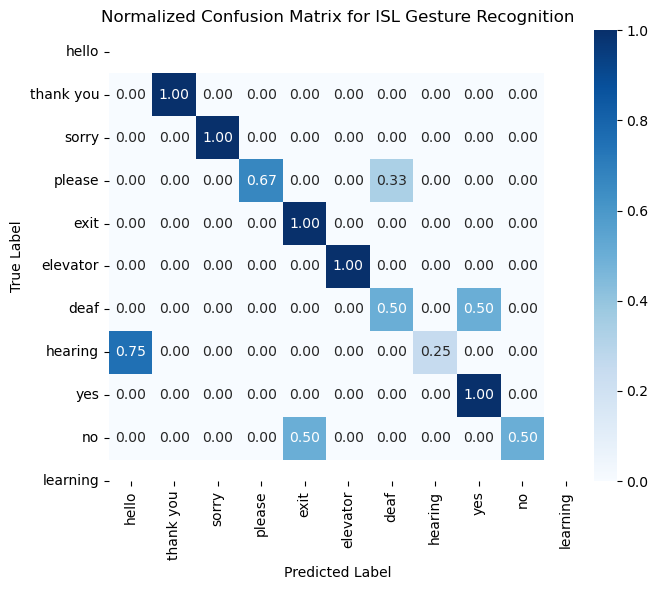

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#class labels
class_names = ["hello", "thank you", "sorry", "please", "exit", 
               "elevator", "deaf", "hearing", "yes", "no", "learning"]

#confusion matrix
cm = confusion_matrix(ytrue, y_predicted)

#normalize for percentage view
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#plot heatmap
plt.figure(figsize=(7,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix for ISL Gesture Recognition")
plt.tight_layout()

In [168]:
#accuracy score on test data
accuracy_score(ytrue, y_predicted)

0.7272727272727273

# Test in Real Time

In [171]:
from scipy import stats

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245),
          (245,66,230), (66,245,230), (230,66,245),
          (66,230,245), (245,230,66), (230,245,66),
          (123,200,150), (200,123,150)]
def probablity_visual(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

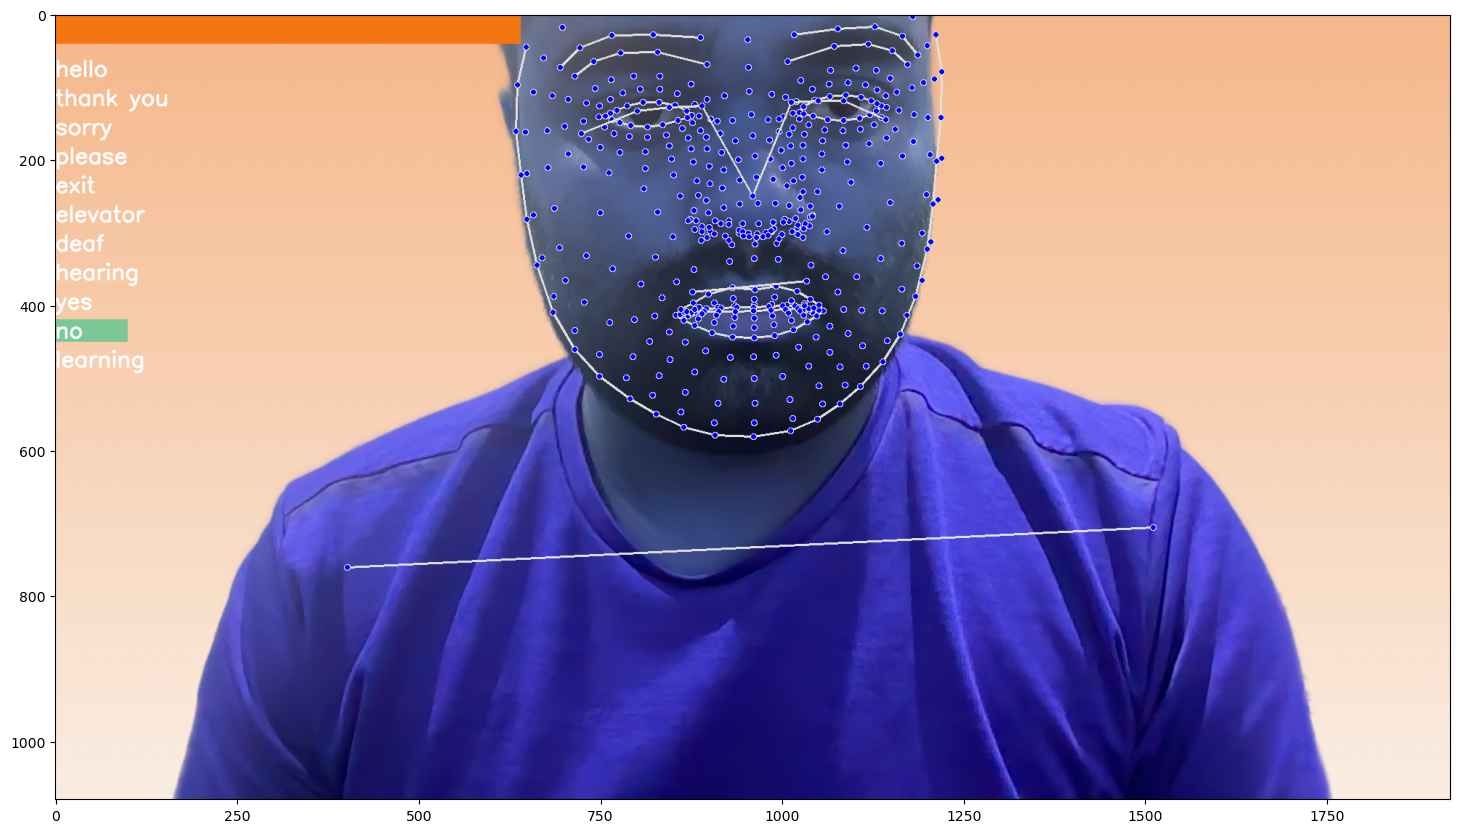

In [93]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:

#detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mediapipe_holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.3) as holis:
    while cap.isOpened():

        #read feed
        ret, frame = cap.read()

        #make detections
        image, results = run_mediapipe(frame, holis)
        print(results)
        
        #draw landmarks
        landmark_visual(image, results)
        
        #prediction logic
        keypoints = ext_keypoint(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) >= 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #visualisation logic
            if np.bincount(predictions[-10:]).argmax() == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            #visualisation probabilities
            image = probablity_visual(res, actions, image, colors)
            
        cv2.rectangle(image, (0, 0), (620, 50), (120, 200, 90), -1)
        cv2.putText(image, ' '.join(sentence), (15, 35), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitkey(1)

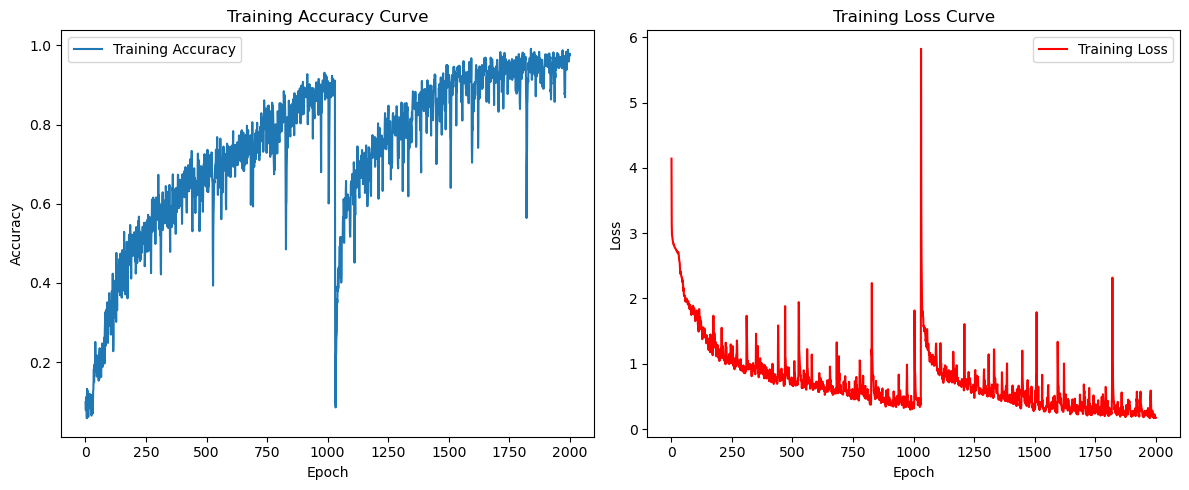

In [95]:
#to plot training and loss curves
import matplotlib.pyplot as plt

#path to your file
log_file_path = "accuracy loss.txt"

epochs = []
accuracy = []
loss = []

with open(log_file_path, "r") as f:
    current_epoch = None
    for line in f:
        if line.startswith("Epoch"):
            try:
                current_epoch = int(line.split("Epoch")[1].split("/")[0].strip())
            except:
                continue
        elif "categorical_accuracy" in line and "loss" in line:
            try:
                parts = line.split(" - ")
                acc = float(parts[1].split(":")[1].strip())
                los = float(parts[2].split(":")[1].strip())
                accuracy.append(acc)
                loss.append(los)
                if current_epoch is not None:
                    epochs.append(current_epoch)
            except:
                continue

#plot curves
plt.figure(figsize=(12, 5))

#accuracy curve
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.legend()

#loss curve
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()

plt.tight_layout()
plt.show()